In [1]:
# import the third-part library
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')

In [2]:
# set the masses of planets
m_1, m_2, m_3 = 10, 20, 30

# set the coordintes for planets
# p1_start = x_1, y_1, z_1
p1_start = np.array([-10, 10, -11])
v1_start = np.array([-3, 0, 0])

# p2_start = x_2, y_2, z_2
p2_start = np.array([0, 0, 0])
v2_start = np.array([0, 0, 0])

# p3_start = x_3, y_3, z_3
p3_start = np.array([10, 10, 12.00000])
v3_start = np.array([3, 0, 0])

# starting coordinates for planets shifted
# p1_start = x_1, y_1, z_1
p1_start_prime = np.array([-10, 10, -11])
v1_start_prime = np.array([-3, 0, 0])

# p2_start = x_2, y_2, z_2
p2_start_prime = np.array([0, 0, 0])
v2_start_prime = np.array([0, 0, 0])

# p3_start = x_3, y_3, z_3
p3_start_prime = np.array([10, 10, 12.000001])
v3_start_prime = np.array([3, 0, 0])

In [3]:
def accelerations(p1, p2, p3):
    '''A function to calculate the derivatives of x, y, and z
    given 3 object and their locations according to Newton's laws
    '''
    planet_1_dv = -9.8 * m_2 * (p1 - p2)/(np.sqrt(np.sum([i**2 for i in p1 - p2]))**3) - 9.8 * m_3 * (p1 - p3)/(np.sqrt(np.sum([i**2 for i in p1 - p3]))**3)

    planet_2_dv = -9.8 * m_3 * (p2 - p3)/(np.sqrt(np.sum([i**2 for i in p2 - p3]))**3) - 9.8 * m_1 * (p2 - p1)/(np.sqrt(np.sum([i**2 for i in p2 - p1]))**3)

    planet_3_dv = -9.8 * m_1 * (p3 - p1)/(np.sqrt(np.sum([i**2 for i in p3 - p1]))**3) - 9.8 * m_2 * (p3 - p2)/(np.sqrt(np.sum([i**2 for i in p3 - p2]))**3)

    return planet_1_dv, planet_2_dv, planet_3_dv

In [4]:
# time parameters
delta_t = 0.001
steps = 100000

In [5]:
# initialize solution array
p1 = np.array([[0.,0.,0.] for i in range(steps)])
v1 = np.array([[0.,0.,0.] for i in range(steps)])

p2 = np.array([[0.,0.,0.] for j in range(steps)])
v2 = np.array([[0.,0.,0.] for j in range(steps)])

p3 = np.array([[0.,0.,0.] for k in range(steps)])
v3 = np.array([[0.,0.,0.] for k in range(steps)])

# second trajectory start, for comparison to (p1, p2, p3)
p1_prime = np.array([[0.,0.,0.] for i in range(steps)])
v1_prime = np.array([[0.,0.,0.] for i in range(steps)])

p2_prime = np.array([[0.,0.,0.] for j in range(steps)])
v2_prime = np.array([[0.,0.,0.] for j in range(steps)])

p3_prime = np.array([[0.,0.,0.] for k in range(steps)])
v3_prime = np.array([[0.,0.,0.] for k in range(steps)])

In [6]:
# starting points
p1[0], p2[0], p3[0] = p1_start, p2_start, p3_start

v1[0], v2[0], v3[0] = v1_start, v2_start, v3_start

p1_prime[0], p2_prime[0], p3_prime[0] = p1_start_prime, p2_start_prime, p3_start_prime

v1_prime[0], v2_prime[0], v3_prime[0] = v1_start_prime, v2_start_prime, v3_start_prime

time = [0]

In [14]:
# evolution of the system
for i in range(steps-1):
    # time.append(i)

    # calculate derivatives
    dv1, dv2, dv3 = accelerations(p1[i], p2[i], p3[i])
    dv1_prime, dv2_prime, dv3_prime = accelerations(p1_prime[i], p2_prime[i], p3_prime[i])

    v1[i + 1] = v1[i] + dv1 * delta_t
    v2[i + 1] = v2[i] + dv2 * delta_t
    v3[i + 1] = v3[i] + dv3 * delta_t

    p1[i + 1] = p1[i] + v1[i] * delta_t
    p2[i + 1] = p2[i] + v2[i] * delta_t
    p3[i + 1] = p3[i] + v3[i] * delta_t

    # alternate trajectory (primes are not derivatives)
    v1_prime[i + 1] = v1_prime[i] + dv1_prime * delta_t
    v2_prime[i + 1] = v2_prime[i] + dv2_prime * delta_t
    v3_prime[i + 1] = v3_prime[i] + dv3_prime * delta_t

    p1_prime[i + 1] = p1_prime[i] + v1_prime[i] * delta_t
    p2_prime[i + 1] = p2_prime[i] + v2_prime[i] * delta_t
    p3_prime[i + 1] = p3_prime[i] + v3_prime[i] * delta_t

# For the purposes of plotting trajectories overt time

    if i % 1000 == 0:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca(projection='3d')
        plt.gca().patch.set_facecolor('black')
        ax.set_xlim([-50, 300])
        ax.set_ylim([-10, 30])
        ax.set_zlim([-30, 70])

        plt.plot([i[0] for i in p1], [j[1] for j in p1], [k[2] for k in p1] , '^', color='red', lw = 0.05, markersize = 0.01, alpha=0.5)
        plt.plot([i[0] for i in p2], [j[1] for j in p2], [k[2] for k in p2] , '^', color='white', lw = 0.05, markersize = 0.01, alpha=0.5)
        plt.plot([i[0] for i in p3], [j[1] for j in p3], [k[2] for k in p3] , '^', color='blue', lw = 0.05, markersize = 0.01, alpha=0.5)
        # plt.plot([i[0] for i in p1_prime], [j[1] for j in p1_prime], [k[2] for k in p1_prime], '^', color='blue', lw=0.05, markersize=0.01, alpha=0.5)

        plt.axis('on')

        # optional: use if reference axes skeleton is desired,
        # ie plt.axis is set to 'on'
        ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])

        # make pane's have the same colors as background
        ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
        ax.view_init(elev = 20, azim = i//1000)
        plt.savefig('{}'.format(i//1000), bbox_inches='tight', dpi=300)
        plt.close()

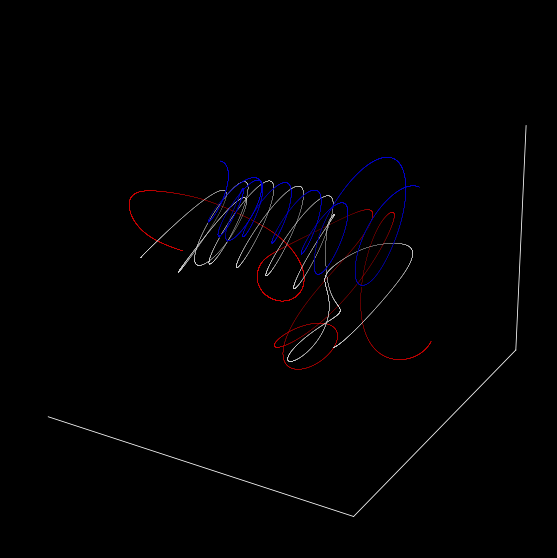

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
plt.gca().patch.set_facecolor('black')

plt.plot([i[0] for i in p1], [j[1] for j in p1], [k[2] for k in p1] , '^', color='red', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p2], [j[1] for j in p2], [k[2] for k in p2] , '^', color='white', lw = 0.05, markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p3], [j[1] for j in p3], [k[2] for k in p3] , '^', color='blue', lw = 0.05, markersize = 0.01, alpha=0.5)
# plt.plot([i[0] for i in p2_prime], [j[1] for j in p2_prime], [k[2] for k in p2_prime], '^', color='blue', lw=0.05, markersize=0.01, alpha=0.5)

plt.axis('on')

# optional: use if reference axes skeleton is desired,
# ie plt.axis is set to 'on'
ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])

# make pane's have the same colors as background
ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))

ax.view_init(elev = 20, azim = t)
plt.savefig('{}'.format(t), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

ValueError: x and y must have same first dimension, but have shapes (1,) and (100000,)

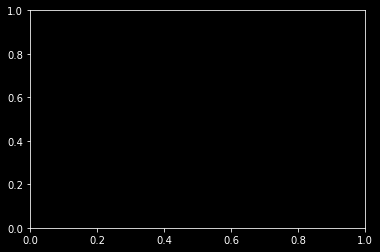

In [18]:
# Plots the distance between the original and shifted points over time

distance_2 = []
for i in range(steps):
    distance_2.append(np.sqrt(np.sum([j**2 for j in p2[i] - p2_prime[i]])))

distance_1 = []
for i in range(steps):
    distance_1.append(np.sqrt(np.sum([j**2 for j in p1[i] - p1_prime[i]])))

distance_3 = []
for i in range(steps):
    distance_3.append(np.sqrt(np.sum([j**2 for j in p3[i] - p3_prime[i]])))


fig, ax = plt.subplots()
ax.plot(time, distance_1, alpha=0.5, color='red')
ax.plot(time, distance_2, alpha=0.5, color='grey')
ax.plot(time, distance_3, alpha=0.5, color='blue')
plt.ylim(0, 120)
ax.set(xlabel='time', ylabel='Distance')
plt.show()
# plt.savefig('{}.png'.format(t), dpi=300)
plt.close()

In [17]:
import imageio

gif_images = []
for i in range(0, 100):
    gif_images.append(imageio.imread(str(i)+".png"))   # 读取图片
imageio.mimsave("3_body1.gif", gif_images, fps=10)   # 转化为gif动画